## Домашнее задание : "Обучение с подкреплением"

ФИО: Шахвалиева Юлиана Сергеевна

In [52]:
import gymnasium as gym
import numpy as np
import random
import math
import imageio
from collections import defaultdict
import matplotlib.pyplot as plt 
from IPython.display import clear_output
import torch
from torch import nn
from torch.nn import functional as F
from torch.optim import Adam
import cv2 
from IPython import display
import matplotlib
import gc
from time import time
from IPython.display import Video

%matplotlib inline

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Задание 1

Обучите алгоритм Q-learning для сред FrozenLake-v1 и Blackjack-v1, в частности подберите оптимальную alpha. (1 балл)

In [86]:
class Qlearning:
    def __init__(self, env, alpha, gamma):
        self.q_values = defaultdict(lambda: np.zeros(env.action_space.n))
        self.alpha = alpha
        self.gamma = gamma

    def act(self, state):
        return int(np.argmax(self.q_values[state]))

    def update(self, state, action, next_state, reward):
        self.q_values[state][action] = (1 - self.alpha) * self.q_values[state][action] + self.alpha * (
                reward + self.gamma * np.max(self.q_values[next_state]))

In [87]:
def evaluate_policy(environment, agent, episodes):
    env = gym.make(environment)
    returns = []

    for _ in range(episodes):
        done = False
        state = env.reset()[0]
        total_reward = 0.

        while not done:
            state, reward, done, _, _ = env.step(agent.act(state))
            total_reward += reward
        returns.append(total_reward)

    return returns

In [92]:
def record_video(env, agent, out_name, fps=1):
    done = False
    state = env.reset()[0]
    img = env.render()
    images = [img]  
    while not done:
        action = agent.act(state)
        next_state, reward, done, _, _ = env.step(action)
        img = env.render()
        images.append(img)
    imageio.mimsave(out_name, [np.array(img) for i, img in enumerate(images)], fps=fps)

In [89]:
def train(environment, episodes, alpha, gamma, eps, video_name=False):
    total_rewards, total_std = [], []
    best_reward = - math.inf
    env = gym.make(environment)
    agent = Qlearning(env=env, alpha=alpha, gamma=gamma)
    state = env.reset()[0]

    for i in range(episodes):
        if random.random() < eps:
            action = env.action_space.sample()
        else:
            action = agent.act(state)

        next_state, reward, done, _, _ = env.step(action)
        agent.update(state, action, next_state, reward)
        state = next_state if not done else env.reset()[0]

        if (i + 1) % (episodes // 100) == 0:
            rewards = evaluate_policy(environment, agent, 100)
            reward_mean = np.mean(rewards)
            reward_std = np.std(rewards)
            total_rewards.append(reward_mean)
            total_std.append(reward_std)
            
            if reward_mean > best_reward:
                best_reward = reward_mean
                best_q_values = agent.q_values
            
            clear_output(True)
            print(f"Step: {i + 1}, Reward mean: {reward_mean}, Reward std: {reward_std}")
            plt.figure(figsize=(8, 4))
            
            plt.subplot(1, 2, 1)
            plt.plot(total_rewards)
            plt.title('Mean reward')
            plt.xlabel('Steps', fontsize=16)
            plt.grid()
            
            plt.subplot(1, 2, 2)
            plt.plot(total_std)
            plt.title('Std reward')
            plt.xlabel('Steps', fontsize=16)
            plt.grid()
            plt.show()
            
    if video_name:
        env = gym.make(environment, render_mode="rgb_array")
        agent = Qlearning(env=env, alpha=alpha, gamma=gamma)
        agent.q_values = best_q_values
        record_video(env, agent, video_name, fps=1)

Обучение для среды "FrozenLake-v1" с разными параметрами alpha.

Step: 6000000, Reward mean: 0.52, Reward std: 0.4995998398718718


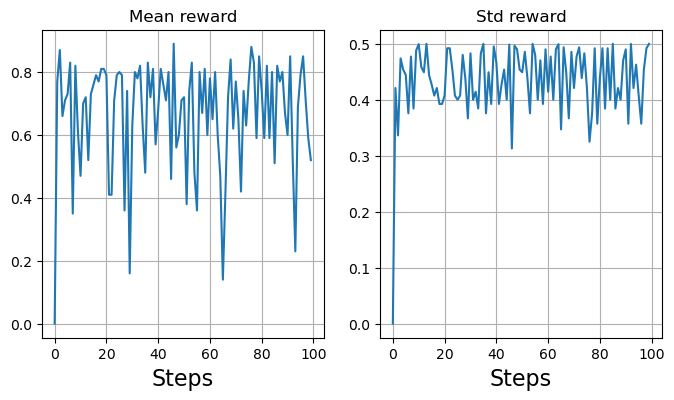

In [43]:
environment = "FrozenLake-v1"

episodes = 6_000_000
alpha = 0.1
gamma = 0.95
eps = 0.1

train(environment, episodes, alpha, gamma, eps, video_name=f'{environment}_{alpha}.mp4')

Step: 6000000, Reward mean: 0.31, Reward std: 0.46249324319388707


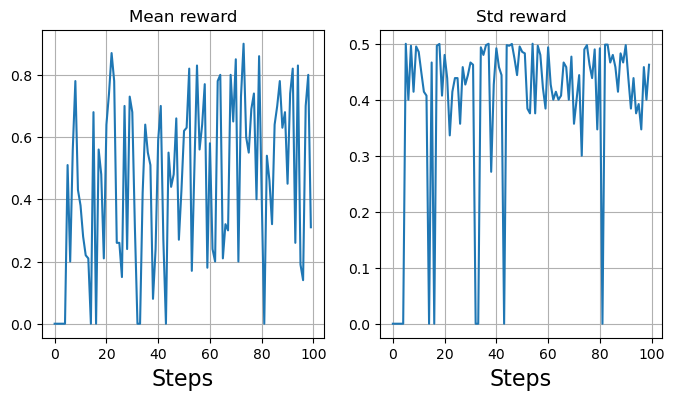

In [44]:
environment = "FrozenLake-v1"

episodes = 6_000_000
alpha = 0.5
gamma = 0.95
eps = 0.1

train(environment, episodes, alpha, gamma, eps)

Step: 1000000, Reward mean: 0.22, Reward std: 0.41424630354415964


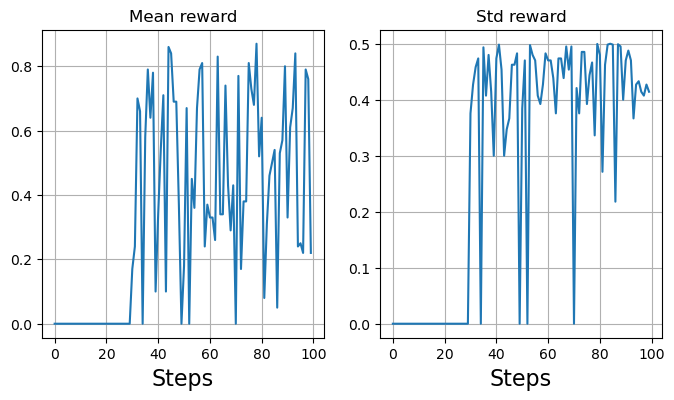

In [10]:
environment = "FrozenLake-v1"

episodes = 1_000_000
alpha = 0.7
gamma = 0.95
eps = 0.1

train(environment, episodes, alpha, gamma, eps)

**Выводы для среды FrozenLake-v1:** было произведено обучение в течение 6.000.000 эпизодов с разными alpha. 
+ **alpha = 0.1:**
    среднее значение награды: 0.7, алгоритм быстро пришел к такому значению;

+ **alpha = 0.5:**
    при таком значении алгоритм ведет себя крайне нестабильно;

+ **alpha = 0.8:**
    при таком значении алгоритм ведет себя крайне нестабильно.
    
Таким образом, лучшее значение alpha для данной среды - 0.1. 

Демонстрация обученного агента.

In [2]:
Video("FrozenLake-v1_0.1.mp4", embed=True)

Обучение для среды "Blackjack-v1" с разными параметрами alpha.

Step: 6000000, Reward mean: -0.21, Reward std: 0.9622369770487933


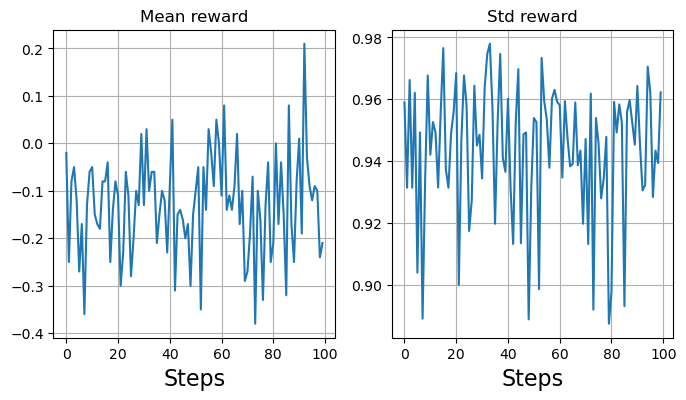

In [93]:
environment = "Blackjack-v1"

episodes = 6_000_000
alpha = 0.1
gamma = 0.95
eps = 0.1

train(environment, episodes, alpha, gamma, eps, video_name=f'{environment}_{alpha}.mp4')

Step: 6000000, Reward mean: -0.06, Reward std: 0.9676776322722355


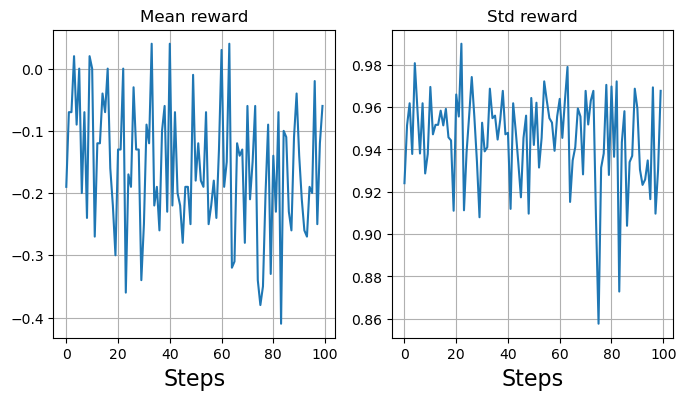

In [94]:
environment = "Blackjack-v1"

episodes = 6_000_000
alpha = 0.5
gamma = 0.95
eps = 0.1

train(environment, episodes, alpha, gamma, eps, video_name=f'{environment}_{alpha}.mp4')

Step: 6000000, Reward mean: -0.2, Reward std: 0.9273618495495705


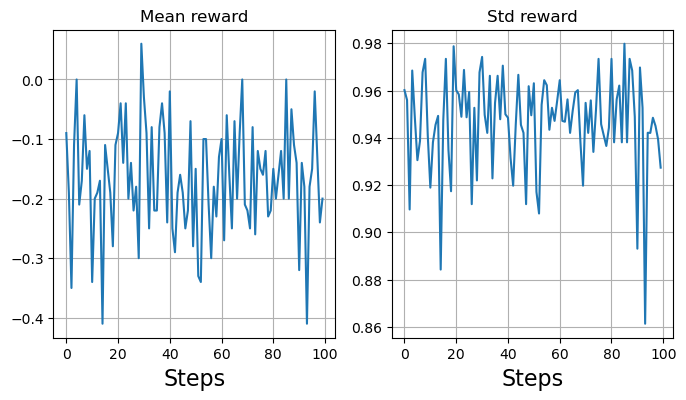

In [95]:
environment = "Blackjack-v1"

episodes = 6_000_000
alpha = 0.8
gamma = 0.95
eps = 0.1

train(environment, episodes, alpha, gamma, eps, video_name=f'{environment}_{alpha}.mp4')

**Выводы для среды Blackjack-v1:** было произведено обучение в течение 6.000.000 эпизодов с разными alpha. Награда в данной игре: +1 за выигрыш, -1 за проигрыш. Все агенты показывали средний результат примерно -0.1. Тем не менее, агент, с alpha =0.1 в конце начал показывать улучшения.

Таким образом, лучшее значение alpha для данной среды - 0.1.

In [100]:
Video("Blackjack-v1_0.1.mp4", embed=True)

# Задание 2

Обучите алгоритм Policy Gradients (или Actor Critic) для среды https://www.gymlibrary.dev/environments/atari/breakout/ . Продемонстрируйте, что для обученного агента растет время игры. (3 балла)

In [28]:
ENV_NAME = "ALE/Breakout-v5"

LAMBDA = 0.95
GAMMA = 0.99

CLIP = 0.2
ITERATIONS = 30_000

SEED = 10
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

In [29]:
class ImageToPyTorch(gym.ObservationWrapper):
    def __init__(self, env):
        super(ImageToPyTorch, self).__init__(env)
        old_shape = self.observation_space.shape
        self.observation_space = gym.spaces.Box(low=0, high=255,
                                                shape=(old_shape[-1], old_shape[0], old_shape[1]),
                                                dtype=np.uint8)

    def observation(self, observation):
        return np.transpose(observation, axes=(2, 0, 1))


In [47]:
def make_env(gym_id, demo=False):
    if not demo:
        env = gym.make(gym_id)
    else:
        env = gym.make(gym_id, render_mode='rgb_array')
    env = ImageToPyTorch(env)
    return env

In [44]:
class Actor(nn.Module):
    def __init__(self, state_dim, action_dim):
        super().__init__()
        self.model = nn.Sequential(nn.Conv2d(state_dim, 16, 8, stride=4),
                                   nn.MaxPool2d(3, stride=2),
                                   nn.ReLU(),
                                   nn.Conv2d(16, 32, 4, stride=2),
                                   nn.MaxPool2d(3, stride=2),
                                   nn.ReLU(),
                                   nn.Conv2d(32, 32, 3, stride=1),
                                   nn.ReLU(),
                                   nn.Flatten(),
                                   nn.Linear(96, 128),
                                   nn.ReLU(),
                                   nn.Linear(128, action_dim)).to(device)

    def compute_proba(self, state, action):
        _, distribution = self.act(state)
        return torch.exp(distribution.log_prob(action).sum(-1))

    def act(self, state):
        x = self.model(state)
        distribution = torch.distributions.Categorical(logits=x)
        action = distribution.sample()
        return action, distribution

In [42]:
class Critic(nn.Module):
    def __init__(self, state_dim):
        super().__init__()
        self.model = nn.Sequential(nn.Conv2d(state_dim, 16, 8, stride=4),
                                   nn.MaxPool2d(3, stride=2),
                                   nn.ReLU(),
                                   nn.Conv2d(16, 32, 4, stride=2),
                                   nn.MaxPool2d(3, stride=2),
                                   nn.ReLU(),
                                   nn.Conv2d(32, 32, 3, stride=1),
                                   nn.ReLU(),
                                   nn.Flatten(),
                                   nn.Linear(96, 128),
                                   nn.ReLU(),
                                   nn.Linear(128, 1)).to(device)


    def get_value(self, state):
        return self.model(state)

In [33]:
class PPO:
    def __init__(self, state_dim, action_dim):
        self.actor = Actor(state_dim, action_dim).to(device)
        self.critic = Critic(state_dim).to(device)
        self.actor_optim = Adam(self.actor.parameters(), 2e-4)
        self.critic_optim = Adam(self.critic.parameters(), 1e-4)

    def update(self, trajectories):
        transitions = [t for traj in trajectories for t in traj]
        state, action, old_prob, target_value, advantage = zip(*transitions)
        state = np.array(state)
        action = np.array(action)
        old_prob = np.array(old_prob)
        target_value = np.array(target_value)
        advantage = np.array(advantage)
        advnatage = (advantage - advantage.mean()) / (advantage.std() + 1e-8)

        s = torch.tensor(state).float().to(device)
        a = torch.tensor(action).float().to(device)
        op = torch.tensor(old_prob).float().to(device)
        v = torch.tensor(target_value).float().to(device) 
        adv = torch.tensor(advantage).float().to(device)

        prob = self.actor.compute_proba(s, a)
        ratio = prob / op
        surr1 = ratio * adv
        surr2 = torch.clamp(ratio, 1 - CLIP, 1 + CLIP) * adv
        actor_loss = - torch.min(surr1, surr2).mean()
        self.actor_optim.zero_grad()
        actor_loss.backward()
        self.actor_optim.step()   

        value = self.critic.get_value(s)
        target = v.unsqueeze(1)
        critic_loss = F.smooth_l1_loss(value, target)
        self.critic_optim.zero_grad()
        critic_loss.backward()
        self.critic_optim.step()

    def get_value(self, state):
        with torch.no_grad():
            state = torch.tensor(np.array([state])).float().to(device)
            value = self.critic.get_value(state)
        return value.cpu().item()

    def act(self, state):
        with torch.no_grad():
            state = torch.tensor(np.array([state])).float().to(device)
            action, distr = self.actor.act(state)
            prob = torch.exp(distr.log_prob(action).sum(-1))
        return action.cpu().numpy()[0], prob.cpu().item()

    def save(self, reward):
        torch.save(self.actor, f"./agent/agent_{reward}.pkl")

In [34]:
def compute_lambda_returns_and_gae(trajectory):
    lambda_returns = []
    gae = []
    last_lr = 0.
    last_v = 0.
    for _, _, r, _, v in reversed(trajectory):
        ret = r + GAMMA * (last_v * (1 - LAMBDA) + last_lr * LAMBDA)
        last_lr = ret
        last_v = v
        lambda_returns.append(last_lr)
        gae.append(last_lr - v)
    
    return [(s, a, p, v, adv) for (s, a, _, p, _), v, adv in zip(trajectory, reversed(lambda_returns), reversed(gae))]

In [35]:
def sample_episode(env, agent):
    s = env.reset()[0]
    d = False
    trajectory = []
    while not d:
        a, p = agent.act(s)
        v = agent.get_value(s)
        ns, r, d, _, _ = env.step(a)
        trajectory.append((s, a, r, p, v))
        s = ns
    return compute_lambda_returns_and_gae(trajectory)

In [36]:
def evaluate_policy(env, agent, episodes=5):
    returns = []
    for _ in range(episodes):
        done = False
        state = env.reset()[0]
        total_reward = 0.
        
        while not done:
            state, reward, done, _, _ = env.step(agent.act(state)[0])
            total_reward += reward
            
        returns.append(total_reward)
    return returns

Step: 30000, Reward mean: 4.2, Reward std: 1.9390719429665317


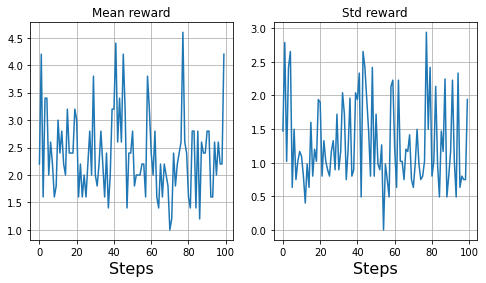

In [14]:
total_rewards, total_std = [], []
env = make_env(ENV_NAME)
ppo = PPO(state_dim=env.observation_space.shape[0], action_dim=env.action_space.n)
state = env.reset()[0]

for i in range(ITERATIONS):
    traj = sample_episode(env, ppo)
    ppo.update([traj]) 
    print(i)

    if (i + 1) % (ITERATIONS // 100) == 0:
        
        rewards = evaluate_policy(env, ppo, 5)
        
        reward_mean = np.mean(rewards)
        reward_std = np.std(rewards)
        total_rewards.append(reward_mean)
        total_std.append(reward_std)
        
        ppo.save(round(reward_mean, 2))
        
        clear_output(True)
        print(f"Step: {i + 1}, Reward mean: {reward_mean}, Reward std: {reward_std}")
        plt.figure(figsize=(8, 4))

        plt.subplot(1, 2, 1)
        plt.plot(total_rewards)
        plt.title('Mean reward')
        plt.xlabel('Steps', fontsize=16)
        plt.grid()

        plt.subplot(1, 2, 2)
        plt.plot(total_std)
        plt.title('Std reward')
        plt.xlabel('Steps', fontsize=16)
        plt.grid()
        plt.show()

Step: 10000, Reward mean: 3.2, Reward std: 2.039607805437114


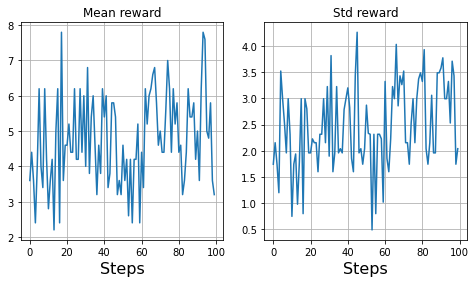

In [57]:
total_rewards, total_std = [], []
env = make_env(ENV_NAME)
ppo = PPO(state_dim=env.observation_space.shape[0], action_dim=env.action_space.n)
state = env.reset()[0]

for i in range(ITERATIONS):
    traj = sample_episode(env, ppo)
    ppo.update([traj]) 
    print(i)
    gc.collect()

    if (i + 1) % (ITERATIONS // 100) == 0:
        
        rewards = evaluate_policy(env, ppo, 5)
        
        reward_mean = np.mean(rewards)
        reward_std = np.std(rewards)
        total_rewards.append(reward_mean)
        total_std.append(reward_std)
        
        ppo.save(round(reward_mean, 2))
        
        clear_output(True)
        print(f"Step: {i + 1}, Reward mean: {reward_mean}, Reward std: {reward_std}")
        plt.figure(figsize=(8, 4))

        plt.subplot(1, 2, 1)
        plt.plot(total_rewards)
        plt.title('Mean reward')
        plt.xlabel('Steps', fontsize=16)
        plt.grid()

        plt.subplot(1, 2, 2)
        plt.plot(total_std)
        plt.title('Std reward')
        plt.xlabel('Steps', fontsize=16)
        plt.grid()
        plt.show()

Step: 30000, Reward mean: 6.2, Reward std: 1.6000000000000003


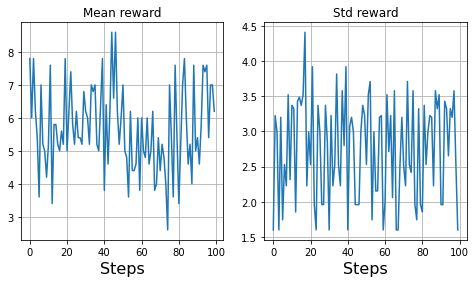

In [15]:
total_rewards, total_std = [], []
env = make_env(ENV_NAME)
ppo = PPO(state_dim=env.observation_space.shape[0], action_dim=env.action_space.n)
state = env.reset()[0]

for i in range(ITERATIONS):
    traj = sample_episode(env, ppo)
    ppo.update([traj]) 
    print(i)
    gc.collect()

    if (i + 1) % (ITERATIONS // 100) == 0:
        
        rewards = evaluate_policy(env, ppo, 5)
        
        reward_mean = np.mean(rewards)
        reward_std = np.std(rewards)
        total_rewards.append(reward_mean)
        total_std.append(reward_std)
        
        ppo.save(round(reward_mean, 2))
        
        clear_output(True)
        print(f"Step: {i + 1}, Reward mean: {reward_mean}, Reward std: {reward_std}")
        plt.figure(figsize=(8, 4))

        plt.subplot(1, 2, 1)
        plt.plot(total_rewards)
        plt.title('Mean reward')
        plt.xlabel('Steps', fontsize=16)
        plt.grid()

        plt.subplot(1, 2, 2)
        plt.plot(total_std)
        plt.title('Std reward')
        plt.xlabel('Steps', fontsize=16)
        plt.grid()
        plt.show()

Было произведено обучение агента для среды Breakout c различными параметрами. Тем не менее, мне не удалось добиться высокого качества игры агента, так как данная среда весьма энергоемкая: размерность состояния - (260, 160, 3). Для качественного обучения такой среды мне не хватает вычислительных ресурсов. Лучшая средняя награда за 5 эпизодов, которой удалось добиться - 9.67. Ниже продемонстрирована работа данного агента.

In [25]:
class AgentForTest:
    def __init__(self):
        self.model = torch.load("agent.pkl")
        
    def act(self, state):
        with torch.no_grad():
            state = torch.tensor(np.array([state]), device=device).float()
            action, distr = self.model.act(state)
        return action.cpu().numpy()[0]

    def reset(self):
        pass

In [77]:
def record_breakout(env, agent, fps=1):
    # Игра необученного агента
    reward_final_random = 0
    done = False
    state = env.reset()[0]
    img = env.render()
    images = [img]
    start_time_random = time()
    while not done:
        action = env.action_space.sample()
        next_state, reward, done, _, _ = env.step(action)
        img = env.render()
        images.append(img)
        reward_final_random += reward
    print(f'Время игры необученного агента: {time() - start_time_random}')
    print(f'Суммарная награда необученного агента: {reward_final_random}\n')
    imageio.mimsave('breakout_random.mp4', [np.array(img) for i, img in enumerate(images)], fps=fps)
    
    # Игра обученного агента
    reward_final_pretrained = 0
    done = False
    state = env.reset()[0]
    img = env.render()
    images = [img]
    start_time_pretrained = time()
    while not done:
        action = agent.act(state)
        next_state, reward, done, _, _ = env.step(action)
        img = env.render()
        images.append(img)
        reward_final_pretrained += reward
    print(f'Время игры обученного агента: {time() - start_time_pretrained}')
    print(f'Суммарная награда обученного агента: {reward_final_pretrained}')
    imageio.mimsave('breakout_pretrained.mp4', [np.array(img) for i, img in enumerate(images)], fps=fps)

Запись и воспроизведение игр обученного и необученного агента.

In [78]:
record_breakout(make_env(ENV_NAME, True), AgentForTest(), 24)

Время игры необученного агента: 0.13399982452392578
Суммарная награда необученного агента: 2.0



Время игры обученного агента: 1.9395806789398193
Суммарная награда обученного агента: 12.0


In [79]:
Video("breakout_random.mp4", embed=True)

In [80]:
Video("breakout_pretrained.mp4", embed=True)

Как видно, время игры агента увеличилось. Суммарная награда выросла в 6 раз. Тем не менее, уровень игры агента все еще низкий.